# Исследование объявлений о продаже квартир

Необходимо исследовать данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**

- airports_nearest— расстояние до ближайшего аэропорта в метрах (м)
- balcony— число балконов
- ceiling_height— высота потолков (м)
- cityCenters_nearest— расстояние до центра города (м)
- days_exposition— сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition— дата публикации
- floor— этаж
- floors_total— всего этажей в доме
- is_apartment— апартаменты (булев тип)
- kitchen_area— площадь кухни в квадратных метрах (м²)
- last_price— цена на момент снятия с публикации
- living_area— жилая площадь в квадратных метрах (м²)
- locality_name— название населённого пункта
- open_plan— свободная планировка (булев тип)
- parks_around3000— число парков в радиусе 3 км
- parks_nearest— расстояние до ближайшего парка (м)
- ponds_around3000— число водоёмов в радиусе 3 км
- ponds_nearest— расстояние до ближайшего водоёма (м)
- rooms— число комнат
- studio— квартира-студия (булев тип)
- total_area— общая площадь квартиры в квадратных метрах (м²)
- total_images— число фотографий квартиры в объявлении

**План работы:**

1. Открытие файла с данными и изучение общей информации

2. Предобработка данных
    
    - Найти и изучить пропущенные значения в столбцах
    - Рассмотреть типы данных в каждом столбце
    - Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты
    - Найти и устранить редкие и выбивающиеся значения

3. Добавление в таблицу новых столбцов со следующими параметрами:
   
    - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - расстояние до центра города в километрах (переведите из мв кми округлите до целых значений).

4. Исследовательский анализ данных:
    
    1. Изучить параметров объектов:
	- общая площадь;
	- жилая площадь;
	- площадь кухни;
	- цена объекта;
	- количество комнат;
	- высота потолков;
	- этаж квартиры;
	- тип этажа квартиры («первый», «последний», «другой»);
	- общее количество этажей в доме;
	- расстояние до центра города в метрах;
	- расстояние до ближайшего аэропорта;
	- расстояние до ближайшего парка;
	- день и месяц публикации объявления;
    - как быстро продавались квартиры.
     
    2. Изучить зависимости цены от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
    
    3. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
    
    4. Описать, как стоимость объектов зависит от расстояния до центра города.
    
5. Общий вывод

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv', sep='\t')
pd.set_option('display.max_columns', None)

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

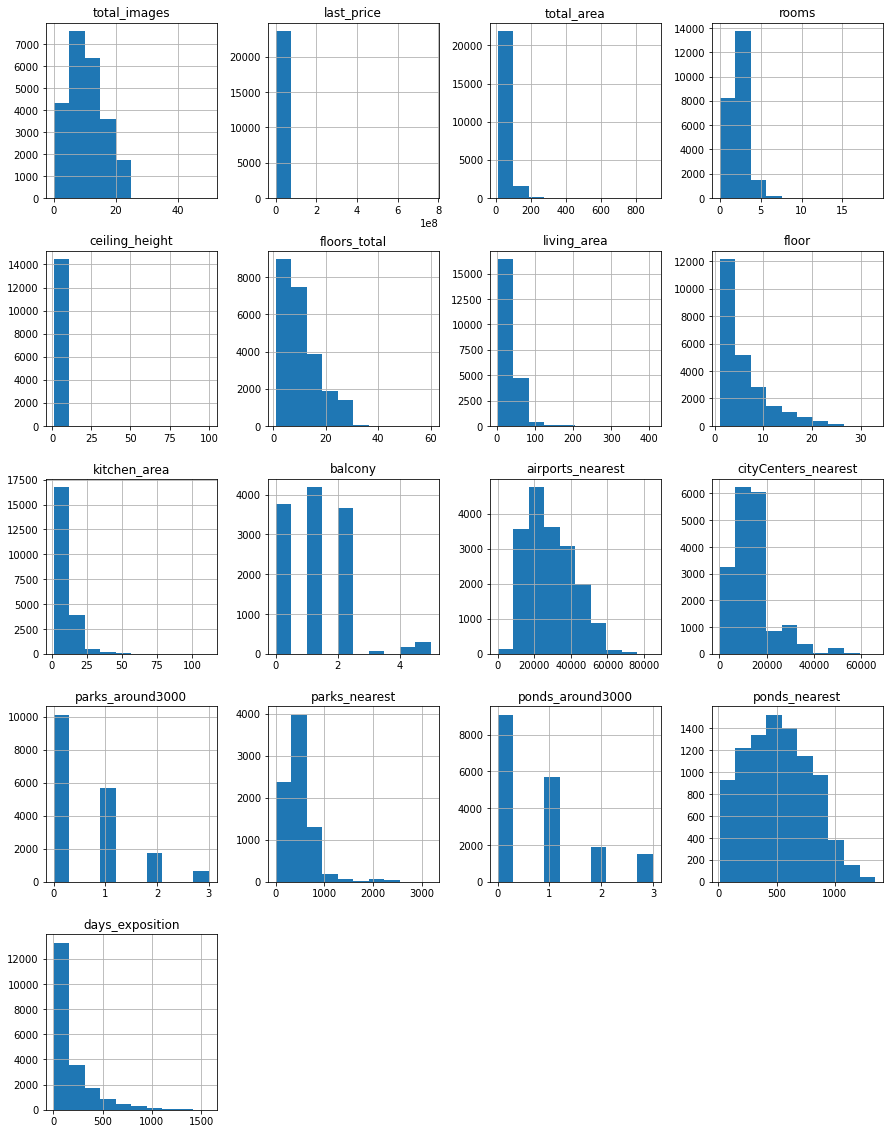

In [3]:
display(data.hist(figsize=(15, 20)))
None

In [4]:
data.isna().sum() # количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<b>Выводы:</b>
- В таблице 23699 строки, 22 столбца;
- В `days_exposition` есть значения, доходящие до 1500, кажутся нереалистичными;
- Есть пропуски в столбцах `ceiling_height`, `floors_total, living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`
- Тип данных `first_day_exposition` должен быть datetime, `floors_total` - int64, `is_apartment` - bool, `balcony` - int64, `parks_around3000` - int64, `ponds_around3000` - int64, `days_exposition` - int64, `last_price` - int64

### Предобработка данных

**Для начала обработаем пропуски в каждом столбце:**

- `ceiling_height` возможная причина - продавец не внес эти данные, так как они необязательны для заполнения, пропуски составляют 38 % от всей выборки - это много, попробуем заменить медианой (среднее не берем, так как среди значений есть аномальные). Данный способ заполнения строк можно считать корректным, так как высота потолков, как правило, различается в квартирах незначительно.

In [5]:
data['ceiling_height'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски
data['ceiling_height'].describe()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isnull().sum()) #проверяем остались ли пропуски

0


- `floors_total` возможная причина: продавец не заполнил эти данные, процент пропусков от всего количества данных незначителен - 0.36%, удалим пропущенные значения

In [6]:
data['floors_total'].isna().sum() / len(data)  * 100 #считаем, сколько процентов составляют пропуски
data = data.dropna(subset = ['floors_total']).reset_index(drop=True)
data['floors_total'].isna().value_counts() #проверяем остались ли пропуски

False    23613
Name: floors_total, dtype: int64

- `living_area` возможная причина: данные не были заполнены продавцом, так как, возможно, эти данные необязательны для заполнения, и не каждый знает точную жилую площадь квартиры. Процент пропусков невысокий - 7.9%, пробовала заменить пропуски медианным значением жилой площади по количеству комнат, но результат получился удручающим, поэтому оставлю, как есть.

In [7]:
data['living_area'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски

7.919366450683945

- `is_apartment` содержит больше всего пропусков, возможно, произошла ошибка при сборе данных, заменим их на False, так этот тип данных булев, а мы наверняка не можем знать, были ли это апартаменты

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isnull().sum()) #проверяем остались ли пропуски

0


 - `kitchen_area`  возможная причина: данные не были заполнены продавцом, процент пропусков невысокий - 9.4%, такая же ситуация, как и с жилой площадью, оставлю как есть.

In [9]:
data['kitchen_area'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски

9.448185321644857

- `balcony` пропуски могут означать, что данные не были заполнены пользователями, так как у них нет балкона. Процент пропусков высокий - 48%, заменим их 0

In [10]:
data['balcony'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isnull().sum()) #проверяем остались ли пропуски

0


- `locality_name` возможная причина - потеря данных, так как пропусков в данном столбце относительно немного - 0.2%, удалим эи значения.

In [11]:
data['locality_name'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски
data = data.dropna(subset = ['locality_name'])
print(data['locality_name'].isnull().sum()) #проверяем остались ли пропуски

0


- `airports_nearest` возможно произошла ошибка в сборе данных, процент пропусков составляет 23%, оставим как есть

In [12]:
data['airports_nearest'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски

23.44154466369616

- `cityCenters_nearest` возможно произошла ошибка в сборе данных, процент пропусков составляет 23%. Заполним пропуски медианным значением до центра для каждого населенного пункта. 

In [13]:
print(data['cityCenters_nearest'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски

data_sample = data.groupby('locality_name').agg({'cityCenters_nearest': 'median'})
print(data_sample['cityCenters_nearest'].isnull().sum())  #проверяем остались ли пропуски

#пропуски остались, так как существут названия локаций, для которых нет значения расстояния до центра города
#для этих пропуском сделаем замену условным значением -1

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
print(data['cityCenters_nearest'].isnull().sum())  #проверяем остались ли пропуски

23.343942287290474
338
0


- `parks_around3000` возможно произошла ошибка в сборе данных, процент пропусков составляет 23.3%, оставим как есть

In [14]:
print(data['parks_around3000'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски

23.33969870570762


- `parks_nearest` возможно произошла ошибка в сборе данных, процент пропусков составляет 65.9% - достаточно большой. У нас нет точного адреса квартиры, поэтому мы не сможем восстновить данные с помощью медианы. Оставим столбец как есть.

In [15]:
print(data['parks_nearest'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски

65.92403988966687


- `ponds_around3000` возможно произошла ошибка в сборе данных, процент пропусков составляет 23.3%, оставим как есть

In [16]:
data['ponds_around3000'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски

23.33969870570762

- `ponds_nearest` возможно произошла ошибка в сборе данных, процент пропусков составляет 61.6% - достаточно большой. У нас нет точного адреса квартиры, поэтому мы не сможем восстновить данные с помощью медианы. Оставим столбец как есть.

In [17]:
print(data['ponds_nearest'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски

61.654996817313815


- `days_exposition` В данном стобце содержится информация о том, сколько дней было размещено объявление (от публикации до снятия), и значения NaN могут означать, что квартира все еще не продана. Можем заменить эти значения 0. Проверим, что в столбце нет значений с 0, если нет, то заполним пропущенные значения на 0.

In [18]:
print(len(data.query('days_exposition == 0')))

#заменим пропуски в days_exposition
data['days_exposition'] = data['days_exposition'].fillna(0)
print(data['days_exposition'].isnull().sum()) #проверяем остались ли пропуски

0
0


Изучим уникальные значения в столбце `locality_name` и устраним неявные дубликаты. Заметили, что значение 'поселок' встречается 556 раз. Сократили количество уникальных значений с 364 до 320.

In [19]:
data['locality_name'].value_counts() 
data['locality_name'].unique() #уникальные значения в столбце
len(data['locality_name'].unique()) #подсчет уникальных значений в столбце

364

In [20]:
#заменяем 
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино','Мурино')

display(data['locality_name'].unique())
display(len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый 

320

**Теперь изменим тип данных:**

- `first_day_exposition` должен быть datetime 
- `floors_total` - int64
- `is_apartment` - bool
- `balcony` - int64 
- `parks_around3000` - int64 
- `ponds_around3000` - int64
- `days_exposition` - int64
- `last_price` - int64

In [21]:
print(data.info()) # проверим типы данных в каждом столбце 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

- `first_day_exposition` меняем тип данных на datetime, так как в этом столбце хранятся данные о дате публикации

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].dtype) #проверяем тип данных

datetime64[ns]


- `floors_total` меняем тип данных на int64, так как количество этажей - целое число

In [23]:
data['floors_total'] = data['floors_total'].astype('int')
print(data['floors_total'].dtype) #проверяем тип данных

int64


- `is_apartment` тип данных изменился автоматически на bool после обработки пропусков 

- `balcony` меняем тип данных на int64, так как количество балконов - целое число

In [24]:
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].dtype) #проверяем тип данных

int64


- `parks_around3000` тип данных изменить невозможно, так как столбец содержит пропуски

- `ponds_around3000` тип данных изменить невозможно, так как столбец содержит пропуски

- `days_exposition` меняем тип данных на int64, так как количество дней - целое число

In [25]:
data['days_exposition'] = data['days_exposition'].astype('int')
print(data['days_exposition'].dtype) #проверяем тип данных

int64


- `last_price` меняем тип данных на int, так как цена - целое число, а также значения неудобны для визуального восприятия, надо разделить на 1000, чтобы получить стоимость квартиры в тыс. руб.

In [26]:
data['last_price'] = data['last_price'] / 1000
data['last_price'] = data['last_price'].astype('int')
print(data['last_price'].dtype) #проверяем тип данных

int64


In [27]:
print(data.info()) # проверим типы данных в каждом столбце после приведения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Найдем и устраним редкие и выбивающиеся значения**

Для начала вызовем числовое описание данных по каждому столбцу, затем построим диаграммы размаха.

In [28]:
for item in data.columns:
    print(data[item].describe())
    print('')

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

count     23565.000000
mean       6540.042987
std       10910.929793
min          12.000000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

count                   23565
unique                   1489
top       2018-02-01 00:00:00
freq                      366
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%  

/tmp/ipykernel_138/1143393849.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data[item].describe())


<AxesSubplot:>

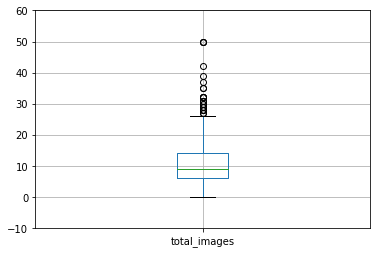

In [29]:
plt.ylim(-10, 60) 
display(data.boxplot(column=['total_images']))

Выбросы начинаются от значения примерно больше 25. Однако мы не можем исключить тот факт, что пользователи действительно загрузили более 25 фотографий, поэтому примем это за нормальные значения.

<AxesSubplot:>

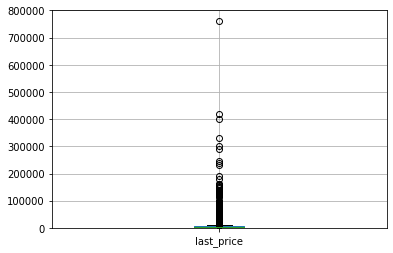

In [30]:
plt.ylim(-10, 800000) 
display(data.boxplot(column=['last_price']))

Мы взяли ограничение в 800 000, так как из числового описания видели максимально значение 763 000 тыс. руб., получился неиформативный график. Надо посмотреть, какие квартиры продаются по цене от 250000 тыс. руб.

In [31]:
print(data.query('last_price > 250000'))
print('Количество квартир дороже 250000 тыс. руб.:', len(data.query('last_price > 250000')))

       total_images  last_price  total_area first_day_exposition  rooms  \
1432             19      330000       190.0           2018-04-04      3   
12917            19      763000       400.0           2017-09-30      7   
14645            15      401300       401.0           2016-02-20      5   
15589            20      300000       618.0           2017-12-18      7   
19465             8      420000       900.0           2017-12-06     12   
22747            18      289238       187.5           2019-03-19      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
1432             3.50             7         95.0      5         False   False   
12917            2.65            10        250.0     10         False   False   
14645            2.65             9        204.0      9         False   False   
15589            3.40             7        258.0      5         False   False   
19465            2.80            25        409.7     25         False

В данной квартире действительно большие площади и много комнат, поэтому рыночная цена может быть высокой. Но эти квартиры могут помешать для дальнейшего анализа, уберем их как выброс, предварительно посчитав, сколько данных мы теряем, если не больше 10% - удаляем. В данном случае потери составят всего 0.03%, можем удалять. 

In [32]:
print(len(data.query('last_price > 250000')) / len(data) * 100) 
#проверяем, сколько % составляют потери, получилось не больше 10%

0.025461489497135583


In [33]:
data = data.loc[data['last_price'] < 250000]

<AxesSubplot:>

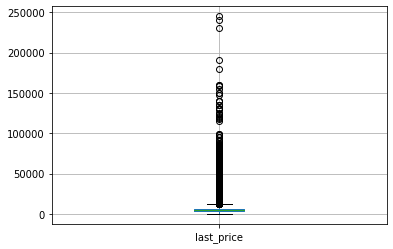

In [34]:
display(data.boxplot(column=['last_price']))

<AxesSubplot:>

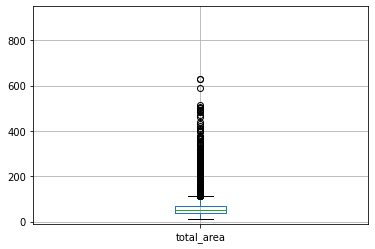

In [35]:
plt.ylim(-10, 950) 
display(data.boxplot(column=['total_area']))

Мы взяли ограничение в 950, так как из числового описания видели максимально значение 900 кв. м. Надо посмотреть, какая квартира заявлена с площадью 900 м2.

In [36]:
print(data.query('total_area == 900'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


Мы видим, что в квартире 12 комнат, поэтому большая площадь оправдана.

<AxesSubplot:>

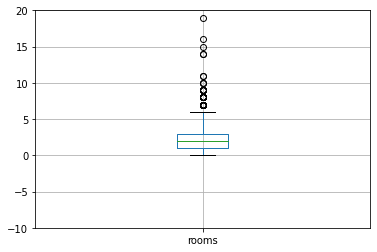

In [37]:
plt.ylim(-10, 20) 
display(data.boxplot(column=['rooms']))

В выбросы попали квартиры от 6-7 комнат, однако мы не будем с ними ничего делать, как показал анализ выше, среди данных действительно встречаются большие квартиры. Проверим квартиру, в которой 19 комнат.

In [38]:
print(data.query('rooms == 19'))

       total_images  last_price  total_area first_day_exposition  rooms  \
14438             6       32250       374.6           2018-06-09     19   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
14438            2.65             5        264.5      2         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
14438      False          27.6        0  Санкт-Петербург           19497.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
14438               3574.0               0.0            NaN               2.0   

       ponds_nearest  days_exposition  
14438          548.0              114  


Площадь этой квартиры - 374.6, достаточно много, такое может быть.

<AxesSubplot:>

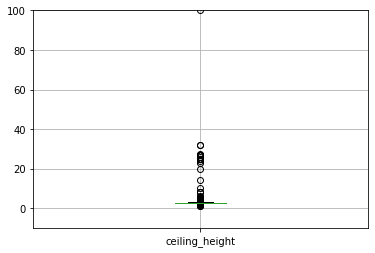

In [39]:
plt.ylim(-10, 100) 
display(data.boxplot(column=['ceiling_height']))

Столбец 'ceiling_height' содержит аномальные значения. Мы построии график, ограничив ось у максимальным значением из числового описания столбца. Однако такой маштаб не дает понять, как много аномальных значений в рассматриваемом столбце. Построим новый график, где ограничим ось у 10 м.

<AxesSubplot:>

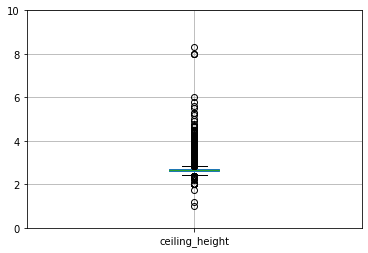

In [40]:
plt.ylim(0, 10) 
display(data.boxplot(column=['ceiling_height']))

Мы видим, что в данных присутствуют потолки, у которых высота меньше двух метров, а также  выше 8 метров, что кажется нереальным. Посмотрим уникальные значения столбца.

In [41]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Мы видим такие значения, как 25, 32, 24, 27, 26, 20, 27.5, 100, 22.6; Предположим, что на самом деле это вещественные значения: 2.5, 3.2, 2.4 и т.д. Изменим значения на верные.

In [42]:
def modify_ceiling(ceiling):
    if 10 <= ceiling <100:
        return ceiling * 0.1
    elif ceiling >= 100:
        return ceiling * 0.01
    else:
        return ceiling

data['ceiling_height'] = data['ceiling_height'].apply(modify_ceiling)

In [43]:
print(data['ceiling_height'].unique())

[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47 2.73
 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2
 2.87 2.66 2.59 2.   2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62
 3.12 2.53 2.74 2.96 2.46 5.3  5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53
 2.83 4.7  2.4  3.38 3.01 5.6  3.65 3.9  3.18 3.35 2.3  3.57 2.48 2.62
 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67 3.87 3.66 3.85 3.86 4.19
 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07 3.37 3.09 8.   3.26 3.34 2.81
 3.44 2.97 3.14 4.37 2.68 3.22 3.27 4.1  2.93 3.46 2.4  3.47 3.33 3.63
 3.32 1.2  8.3  2.98 2.86 3.17 4.4  3.28 3.04 4.45 5.5  3.84 3.23 3.02
 3.21 3.43 3.78 4.3  3.39 2.69 3.31 4.65 3.56 2.2  3.51 3.93 3.42 2.99
 3.49 1.4  4.14 2.91 3.88 1.75 4.25 3.29 2.25 3.76 3.69 6.   2.26 2.89
 3.58 5.8  2.49 4.9  3.48 1.03 1.   3.59]


<AxesSubplot:>

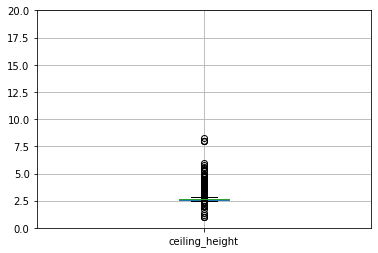

In [44]:
plt.ylim(0, 20) 
display(data.boxplot(column=['ceiling_height']))

Мы знаем, что минимальная норма потолка в России считается от 2.4 метров, а высота вряд ли превышет 5 м. Посмотрим, сколько аномальные значения составляют от выборки - 0.07%. За нижнюю границу возьмем 2 метра, за верхнюю - 5 м. Удалим эти значения.

In [45]:
print(len(data.query('ceiling_height < 2 or ceiling_height > 5')) / len(data) * 100)
data = data.loc[(data['ceiling_height'] >= 2.0) & (data['ceiling_height'] <= 5.0)]
data['ceiling_height'].describe()
print(data['ceiling_height'].sort_values(ascending=False))

0.07215925973088841
1049     5.0
21842    4.9
2795     4.8
1296     4.7
19069    4.7
        ... 
11304    2.0
17428    2.0
4198     2.0
19026    2.0
19256    2.0
Name: ceiling_height, Length: 23542, dtype: float64


<AxesSubplot:>

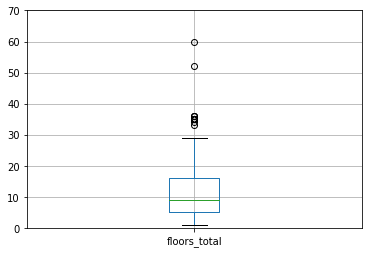

In [46]:
plt.ylim(0, 70) 
display(data.boxplot(column=['floors_total']))

По графику видно, что выбросы начинаются со значений 30. Самое высокое значение - 60. Вполне возможно, что квартира продается в многоэтажном доме, поэтому оставим эти данные.

<AxesSubplot:>

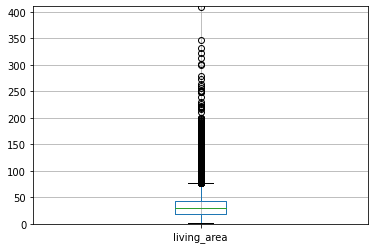

In [47]:
plt.ylim(0, 410) 
display(data.boxplot(column=['living_area']))

Уберем значения меньше 14 кв. м. (минимальная жилая площадь для квартиры), потери составят 1.3%.

In [48]:
print(len(data.query('living_area < 14')) / len(data) * 100) #считаем сколько составят потери
data = data.loc[data['living_area'] >= 14]
data['living_area'].describe()

1.3337864242630193


count    21365.000000
mean        34.720351
std         21.692622
min         14.000000
25%         19.000000
50%         30.100000
75%         42.500000
max        409.000000
Name: living_area, dtype: float64

Теперь посмотрим на квартиры с большой жилой площадью. Общая площадь в таких квартирах также большая, поэтому допустим, что на продажу выставили действительно большие квартиры.

In [49]:
print(data.query('living_area > 250'))

       total_images  last_price  total_area first_day_exposition  rooms  \
657               3       49950       483.9           2017-10-04      7   
1081             16       75000       323.0           2017-07-10      5   
4223              1       50000       517.0           2017-10-14      7   
5339             20       65000       590.0           2019-02-14     15   
7991             20       84000       507.0           2015-12-17      5   
12348            20       91500       495.0           2017-06-19      7   
12805            20      140000       631.2           2019-04-09      7   
14031             8       51000       402.0           2017-02-07      6   
14438             6       32250       374.6           2018-06-09     19   
19790            20      180000       347.0           2015-01-21      8   
20196            12       20000       460.8           2019-03-20      6   
22413             7       91075       491.0           2017-05-27      5   

       ceiling_height  f

<AxesSubplot:>

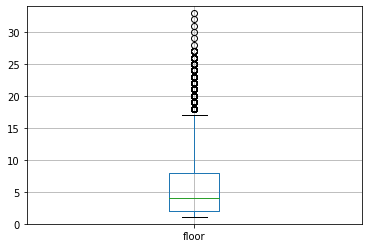

In [50]:
plt.ylim(0, 34) 
display(data.boxplot(column=['floor']))

Посмотрим квартиры, расположенные выше 15 этажа. Данные выглядят нормально.

In [51]:
data.query('floor > 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20,2900,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,-1.0,NaN,NaN,NaN,NaN,189
25,3,6800,76.00,2015-10-01,2,2.75,23,39.00,18,False,False,False,15.00,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300
40,9,3590,36.00,2017-03-15,1,2.60,26,15.00,22,False,False,False,10.00,2,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,430
75,19,4950,44.00,2018-02-27,2,2.70,23,21.00,19,False,False,False,15.00,2,Санкт-Петербург,15749.0,14545.0,0.0,NaN,0.0,NaN,36
83,10,4200,41.40,2018-09-24,1,2.70,25,16.50,20,False,False,False,10.20,0,поселок Парголово,53554.0,19107.0,0.0,NaN,0.0,NaN,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,5,19600,184.00,2016-04-21,3,3.00,19,55.70,19,False,False,False,24.50,5,Санкт-Петербург,18995.0,4837.0,0.0,NaN,0.0,NaN,205
23469,4,4000,39.00,2018-01-19,1,2.65,24,18.00,16,False,False,False,11.00,1,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,299
23501,1,5953,89.60,2015-09-03,3,2.75,23,47.70,17,False,False,False,16.70,0,Санкт-Петербург,26726.0,8880.0,0.0,NaN,1.0,624.0,939
23572,2,5990,64.00,2017-04-21,2,2.65,19,31.00,16,False,False,False,11.00,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,40


<AxesSubplot:>

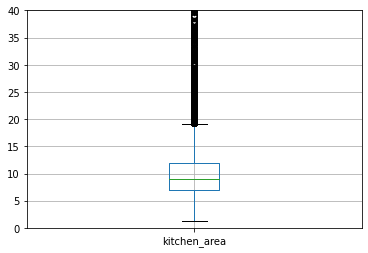

In [52]:
plt.ylim(0, 40) 
display(data.boxplot(column=['kitchen_area']))

Уберем значения меньше 5 кв. м. (минимальная площадь кухни для квартиры), потери составят 0.46%.

In [53]:
print(len(data.query('kitchen_area < 5')) / len(data) * 100) #считаем сколько составят потери
data = data.loc[data['kitchen_area'] >= 5]
data['kitchen_area'].describe()

0.45869412590685704


count    20514.000000
mean        10.489710
std          5.749739
min          5.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

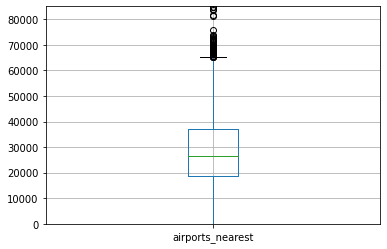

In [54]:
plt.ylim(-10, 85000) 
display(data.boxplot(column=['airports_nearest']))

Данные выглядят нормально.

<AxesSubplot:>

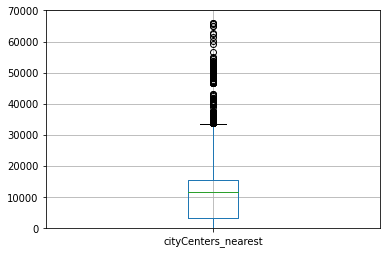

In [55]:
plt.ylim(-10, 70000) 
display(data.boxplot(column=['cityCenters_nearest']))

Данные выглядят нормально.

<AxesSubplot:>

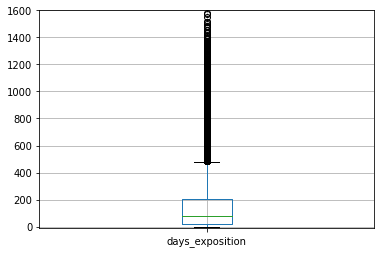

In [56]:
plt.ylim(-10, 1600) 
display(data.boxplot(column=['days_exposition']))

Видим, что выбросы начинаются от 500 дней (больше года) и выше. Посмотрим, что за квартиры продавались более 3-х лет (1095 дней):

In [57]:
display(data.query('days_exposition > 1095'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
351,4,5990,43.5,2015-05-08,1,3.00,5,25.0,4,False,False,False,9.4,0,Санкт-Петербург,10527.0,10278.0,1.0,93.0,0.0,NaN,1292
396,7,12789,79.3,2014-12-09,2,3.00,8,43.1,5,False,False,False,17.6,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1345
435,12,3350,37.0,2015-02-24,1,2.55,6,17.8,6,False,False,False,8.4,0,Петергоф,46151.0,34044.0,1.0,185.0,1.0,755.0,1273
456,13,5200,51.0,2016-03-02,2,2.55,9,32.0,5,False,False,False,6.0,0,Санкт-Петербург,48522.0,16360.0,0.0,NaN,0.0,NaN,1153
518,20,25717,230.1,2015-01-21,3,2.65,3,130.0,1,False,False,False,26.1,1,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,0,4100,88.0,2014-12-10,4,2.65,5,60.7,4,False,False,False,8.2,0,поселок Вырица,NaN,-1.0,NaN,NaN,NaN,NaN,1202
22968,5,11446,90.9,2015-05-25,3,2.70,19,56.9,3,False,False,False,10.7,2,Санкт-Петербург,19499.0,4844.0,0.0,NaN,1.0,503.0,1201
23128,9,7515,58.8,2015-03-10,2,2.65,10,30.4,3,False,False,False,11.1,0,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1239
23164,5,4900,80.0,2014-12-25,3,2.65,15,47.0,14,False,False,False,9.0,2,Мурино,NaN,-1.0,NaN,NaN,NaN,NaN,1187


В данных нет ничего необычного. Поискали доп. информацию о длительности размещения объявлений:

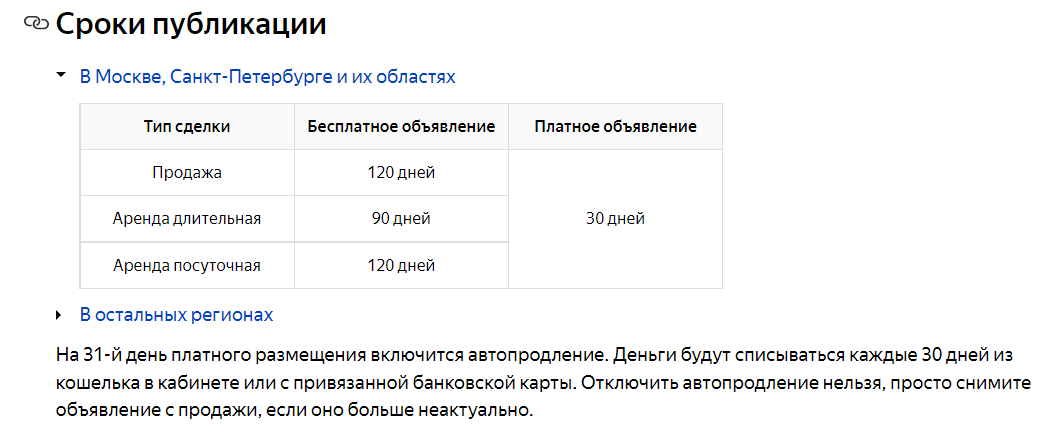

Квартиры - не самый ликвидный товар, соответственно, некоторые из них могут продаваться больше года. Но если объявление было размещено более трех лет после публикации, то скорее всего - это ошибка. Такие данные могут помешать в дальнейшем анализе. Процент таких квартир составляет 0.73%, это меньше 10%, поэтому можем удалять

In [58]:
print(len(data.query('days_exposition > 1095')) / len(data) * 100) #считаем сколько составят потери
data = data.loc[data['days_exposition'] < 1095]
data['days_exposition'].describe()

0.7263332358389393


count    20361.000000
mean       152.018516
std        195.423948
min          0.000000
25%         21.000000
50%         77.000000
75%        200.000000
max       1094.000000
Name: days_exposition, dtype: float64

Столбцы `parks_nearest` и `ponds_nearest` содержат много пропусков, которые мы не можем логически восстановить, поэтому диаграмма размаха для них неактуальна.

Столбцы `parks_around3000` и `ponds_around3000` по числовому описанию выглядят нормально, не будем для них строить диаграмму размаха.

Предобработка завершена. Выведем полученный для дальнейшей работы датасет и общую информацию о нем.

In [59]:
display(data.head(20))
display(data.info())
display(data.isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
4,2,10000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,-1.0,NaN,NaN,NaN,NaN,55
8,20,2900,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,-1.0,NaN,NaN,NaN,NaN,189
9,18,5400,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289
10,5,5050,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137
11,9,3300,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7
12,10,3890,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,-1.0,NaN,NaN,NaN,NaN,90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20361 entries, 0 to 23609
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20361 non-null  int64         
 1   last_price            20361 non-null  int64         
 2   total_area            20361 non-null  float64       
 3   first_day_exposition  20361 non-null  datetime64[ns]
 4   rooms                 20361 non-null  int64         
 5   ceiling_height        20361 non-null  float64       
 6   floors_total          20361 non-null  int64         
 7   living_area           20361 non-null  float64       
 8   floor                 20361 non-null  int64         
 9   is_apartment          20361 non-null  bool          
 10  studio                20361 non-null  bool          
 11  open_plan             20361 non-null  bool          
 12  kitchen_area          20361 non-null  float64       
 13  balcony         

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4531
cityCenters_nearest         0
parks_around3000         4509
parks_nearest           13287
ponds_around3000         4509
ponds_nearest           12542
days_exposition             0
dtype: int64

Вывод:
- Мы восстановили данные в пропусках там, где это возможно, убрали редкие и выбивающиеся значения
- Датафрейм для исследования содержит 20361 строки, таким образом, было удалено 14% первоначальных данных.

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).

In [60]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
print(data['price_one_square_meter'])

0        120.370370
1         82.920792
2         92.785714
4        100.000000
5         95.065789
            ...    
23605    129.903978
23606     45.000000
23607     73.717949
23608     72.490845
23609     52.542373
Name: price_one_square_meter, Length: 20361, dtype: float64


In [61]:
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday
print(data['day_week_exposition'])

0        3
1        1
2        3
4        1
5        0
        ..
23605    3
23606    4
23607    4
23608    1
23609    0
Name: day_week_exposition, Length: 20361, dtype: int64


In [62]:
data['month_exposition'] = data['first_day_exposition'].dt.month
print(data['month_exposition'])

0         3
1        12
2         8
4         6
5         9
         ..
23605    10
23606     7
23607     8
23608     3
23609     1
Name: month_exposition, Length: 20361, dtype: int64


In [63]:
data['year_exposition'] = data['first_day_exposition'].dt.year
print(data['year_exposition'])

0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23605    2016
23606    2017
23607    2016
23608    2017
23609    2018
Name: year_exposition, Length: 20361, dtype: int64


In [64]:
def floor_type_func(floor):
    if floor['floor'] == 1:
        return 'Первый'
    elif floor['floor'] == floor['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
data['floor_type'] = data[['floor', 'floors_total']].apply(floor_type_func, axis=1)
print(data['floor_type'])
data['floor_type'].unique()

0        Другой
1        Первый
2        Другой
4        Другой
5        Другой
          ...  
23605    Другой
23606    Другой
23607    Другой
23608    Другой
23609    Другой
Name: floor_type, Length: 20361, dtype: object


array(['Другой', 'Первый', 'Последний'], dtype=object)

In [65]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data = data.round({'cityCenters_nearest_km': 0}) #округляем до целых
print(data['cityCenters_nearest_km']) #получились отрицательные значения в тех местах, где мы заполнили пропуски -1

0        16.0
1        19.0
2        14.0
4         8.0
5        -0.0
         ... 
23605     4.0
23606    -0.0
23607    34.0
23608     4.0
23609    -0.0
Name: cityCenters_nearest_km, Length: 20361, dtype: float64


In [66]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120.370370,3,3,2019,Другой,16.0
1,7,3350,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82.920792,1,12,2018,Первый,19.0
2,10,5196,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92.785714,3,8,2015,Другой,14.0
4,2,10000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100.000000,1,6,2018,Другой,8.0
5,10,2890,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,-1.0,NaN,NaN,NaN,NaN,55,95.065789,0,9,2018,Другой,-0.0
8,20,2900,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,-1.0,NaN,NaN,NaN,NaN,189,87.454765,2,5,2018,Другой,-0.0
9,18,5400,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88.524590,6,2,2017,Другой,15.0
10,5,5050,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127.525253,3,11,2017,Другой,14.0
11,9,3300,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75.000000,0,8,2018,Другой,52.0
12,10,3890,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,-1.0,NaN,NaN,NaN,NaN,90,72.037037,3,6,2016,Последний,-0.0


### Исследовательский анализ данных

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

AxesSubplot(0.125,0.125;0.775x0.755)


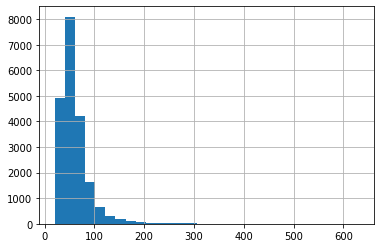

In [67]:
print(data['total_area'].hist(bins=30))

Ожидаемое распределение общей площади — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. По графику видно, что больше всего квартир наблюдается в значениях общей площади 45-50 м2, что вполне соответствует реальности.

AxesSubplot(0.125,0.125;0.775x0.755)


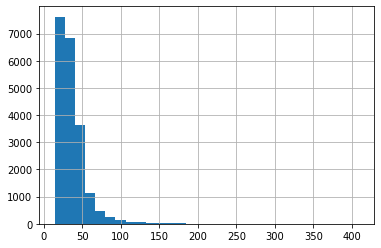

In [68]:
print(data['living_area'].hist(bins=30))

Ожидаемое распределение жилой площади — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. По графику видно, что больше всего квартир наблюдается в значениях жилой площади около 25 м2, что соотносится с данными по общей площади.

AxesSubplot(0.125,0.125;0.775x0.755)


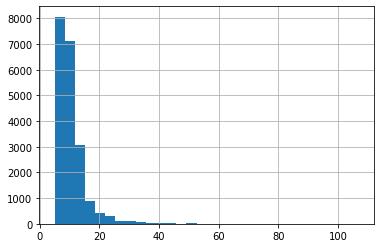

In [69]:
print(data['kitchen_area'].hist(bins=30))

Ожидаемое распределение площади кухни — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. По графику видно, что больше всего квартир наблюдается в значениях около 10 м2, что соотносится с данными по общей площади.

AxesSubplot(0.125,0.125;0.775x0.755)


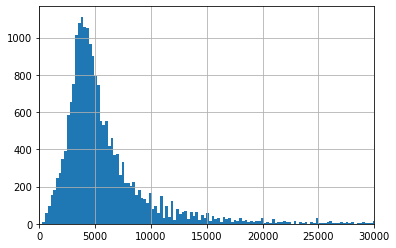

In [70]:
plt.xlim(-10, 30000) #установим такие лимиты для оси у для наглдяности графика
print(data['last_price'].hist(bins=1000))

Ожидаемое распределение цены объекта — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика. По графику видно, что больше всего квартир продается по цене от 4 до 5 млн. Вполне релистичные данные.

AxesSubplot(0.125,0.125;0.775x0.755)


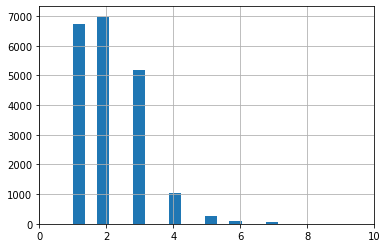

In [71]:
plt.xlim(0, 10) #установим такие лимиты для оси у для наглдяности графика
print(data['rooms'].hist(bins=50))

По графику видно, что есть значения 0 - видимо, кто-то не указал количество комнат, но таких значений мало. Ожидаемые пики - 1 комната, 2 комнаты, чуть меньше 3 комнаты, около 1000 объявлений о 4-х комнатных квартирах, и совсем немного другие. Очевидно, что двухкомнатные и трехкомнатные квартиры фигурируют чаще, так как их в целом больше, чем многокомнатных квартир.  

AxesSubplot(0.125,0.125;0.775x0.755)


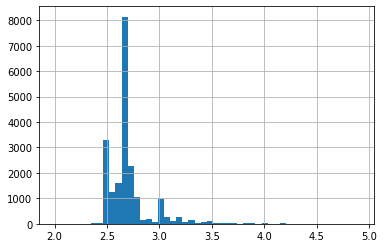

In [72]:
print(data['ceiling_height'].hist(bins=50))

Наблюдается два пика - в значении 2.4 м и 2.8 метра. Может быть квартиры с потолками 2.4 м являются эконом-класса , а 2.8 - стандарт.

AxesSubplot(0.125,0.125;0.775x0.755)


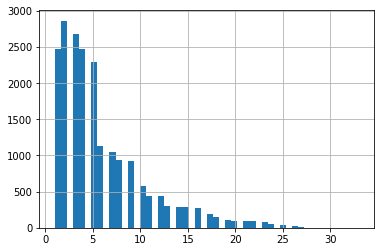

In [73]:
print(data['floor'].hist(bins=50))

По данному графику видно, что больше всего представлены квартиры на этажах до 5-го. На втором месте идут квартиры до 10-го этажа и дальше по снижению. Есть и квартиры, расположенные выше 20 этажа, но таких примеров относительно мало (100-200)

<AxesSubplot:ylabel='floor_type'>

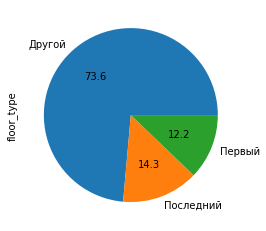

In [74]:
data['floor_type'].value_counts().plot(kind='pie', autopct='%.1f')

Большую часть объявлений о продаже занимают квартиры разных этажей. Инетересно, что первый и последний этаж представлены почти наравне.

AxesSubplot(0.125,0.125;0.775x0.755)


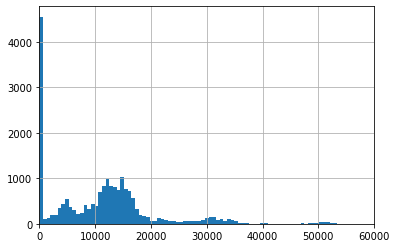

In [75]:
plt.xlim(-10, 60000)
print(data['cityCenters_nearest'].hist(bins=100))

Более 5000 значений -1 - это наша замена пропусков. Остальная гистограмма выглядит нормальной. Видно два пика - на расстоянии около 5 000 м и на расстоянии от 10 000 до 16 000 м. Скорее всего это связано с тем, что есть определенный тип квартир на продажу недалеко от центра, а есть квартиры в спальных районах (новостройки).

AxesSubplot(0.125,0.125;0.775x0.755)


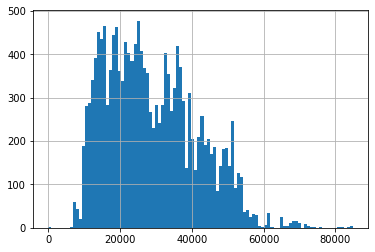

In [76]:
print(data['airports_nearest'].hist(bins=100))

Помним, что в этом столбце мы оставили пропуски, поэтому гистограмма выглдит рваной. Видно, что пик приходится на значения расстояния до аэропорта от 18 000 до 30 000 м. 

AxesSubplot(0.125,0.125;0.775x0.755)


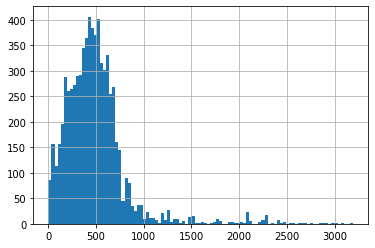

In [77]:
print(data['parks_nearest'].hist(bins=100))

Гистограмма выглядит нормальной, пик приходится на значение около 400 м до ближайшего парка. 

<AxesSubplot:ylabel='day_week_exposition'>

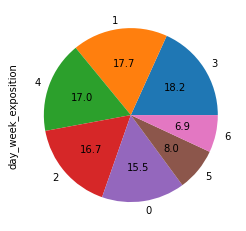

In [78]:
data['day_week_exposition'].value_counts().plot(kind='pie', autopct='%.1f')

Распредление по дням недели следующее: примерно в равных количествах наблюдаются объявления, опубликованные в будние дни, и почти в два раза меньше, чем в будние, в выходные. Логично!

<AxesSubplot:ylabel='month_exposition'>

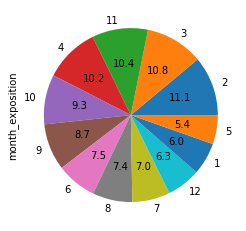

In [79]:
data['month_exposition'].value_counts().plot(kind='pie', autopct='%.1f')

Лидерами, хоть и не с большим отрывом, по количеству опубликованных объявлений являются февраль, март, ноябрь и апрель. Реже публикуются объявления в мае, январе и декабре. Предполагаю, что это может быть связано с праздниками: если у людей намечается в ближайшее время отпуск или другая активность, вроде празднования Нового года, в это время они предпочитают откладывать решение важных дел.

Изучим, как быстро продавались квартиры (столбец days_exposition)

AxesSubplot(0.125,0.125;0.775x0.755)


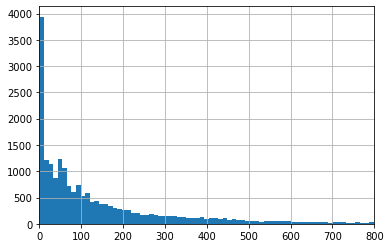

In [80]:
plt.xlim(0, 800)
print(data['days_exposition'].hist(bins=100))

Пик в нуле - это наша замена пропусков на 0. Пик наблюдается в значениях до 80 дней. Посчитаем среднее и медиану.

In [81]:
print(data['days_exposition'].describe())
print(f"Медиана, {data['days_exposition'].median()}")
print(f"Среднее, {data['days_exposition'].mean()}")

count    20361.000000
mean       152.018516
std        195.423948
min          0.000000
25%         21.000000
50%         77.000000
75%        200.000000
max       1094.000000
Name: days_exposition, dtype: float64
Медиана, 77.0
Среднее, 152.01851578999066


Среднее - 152 дня, медиана 77 дней. Разница в 2 раза обусловена большим разбросом данных, будем ориентироваться на медиану. Продажа обычно занимает до 77 дней. Следовательно, продажи до 77 дней можно считать быстрыми, а продажи более 100 дней необычно долгими.

Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Зависимость цены от общей площади. Построим диаграмму рассеяния и поссчитаем коэффициент корреляции.

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='last_price', ylabel='total_area'>

Коэффициент корреляции: 0.724


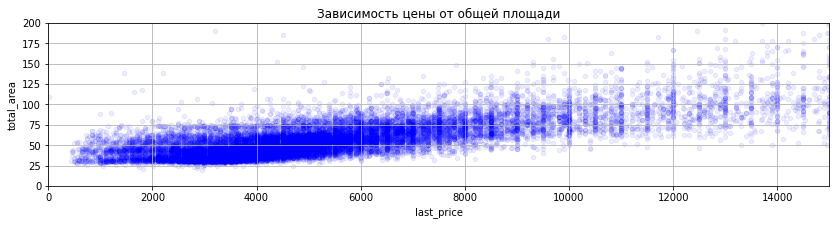

In [82]:
display(data.plot(x='last_price', y='total_area', ylim=(0, 200), xlim=(0, 15000), kind='scatter', grid=True, 
                  color='blue', figsize=(14, 3), title='Зависимость цены от общей площади', alpha=0.07))
corr_total_area = data['last_price'].corr(data['total_area'])
print('Коэффициент корреляции:', '{:.3f}'.format(corr_total_area))

Диаграмма рессеяния показывает, что больше всего объявлений находится в ценовой диапазоне от 2 млн до 6 млн рублей, а по площади от 40 до 60 м2. Коэффициент корреляции Пирсона равен 0.69, можно сделать вывод, что между параметрами "цена" и "общая площадь" имеется положительная корреляция - прямая зависимость.

Зависимость цены от жилой площади. Построим диаграмму рассеяния и поссчитаем коэффициент корреляции.

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='last_price', ylabel='living_area'>

Коэффициент корреляции: 0.648


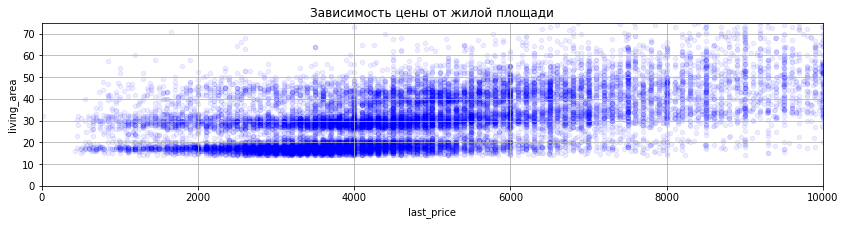

In [83]:
display(data.plot(x='last_price', y='living_area', ylim=(0, 75), xlim=(0, 10000), kind='scatter', grid=True,
                  color='blue', figsize=(14, 3), title='Зависимость цены от жилой площади', alpha=0.07))
corr_living_area = data['last_price'].corr(data['living_area'])
print('Коэффициент корреляции:', '{:.3f}'.format(corr_living_area))

Диаграмма рессеяния показывает, что больше всего объявлений находится в ценовой диапазоне от 2 млн до 5 млн рублей, а по площади два участка: от 15 до 20 м2 и от 25 до 32 м2. Коэффициент корреляции Пирсона равен 0.6, можно сделать вывод, что между параметрами "цена" и "жилая площадь" имеется положительная корреляция - прямая зависимость.

Зависимость цены от площади кухни. Построим диаграмму рассеяния и поссчитаем коэффициент корреляции.

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

Коэффициент корреляции: 0.553


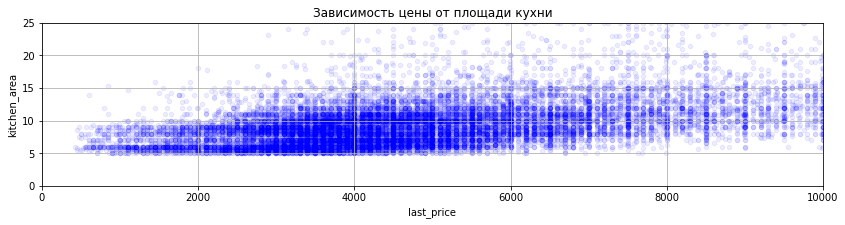

In [84]:
display(data.plot(x='last_price', y='kitchen_area', ylim=(0, 25), xlim=(0, 10000), kind='scatter', grid=True,
                  color='blue', figsize=(14, 3), title='Зависимость цены от площади кухни', alpha=0.07))
corr_kitchen_area = data['last_price'].corr(data['kitchen_area'])
print('Коэффициент корреляции:', '{:.3f}'.format(corr_kitchen_area))

На этом графике зависимость не так очевидна, как на предыдущих двух. По диаграмме рессеяния видим, что среди объявлений чаще всего встречаются предложения от 3 до 5 млн рублей, а по площади кухни от 5 до 11 м2. Корреляция в 0.52 говорит о наличии связи, однако не слишком сильной. 

Зависимость цены от количества комнат. Построим столбчатую гистограмму и проследим зависимость между количеством комнат и средней ценой квартир.

<AxesSubplot:title={'center':'Зависимость количества комнат и средней цены квартиры'}, ylabel='rooms'>

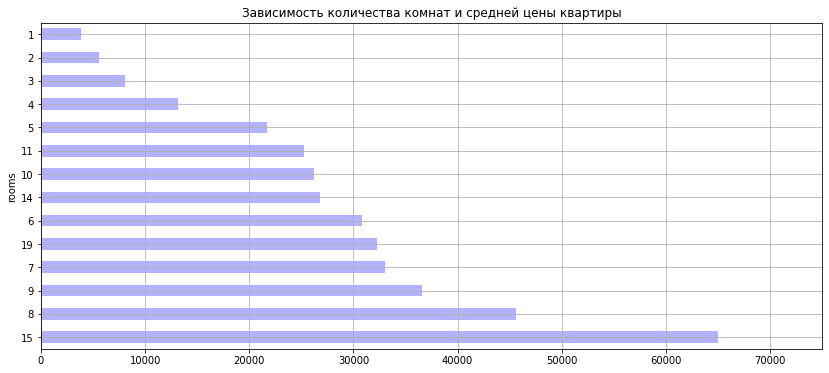

In [85]:
(
    data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость количества комнат и средней цены квартиры', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(0, 75000))
)

Очевидно, что чем больше комнат, тем выше средняя стоимость квартиры.

Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой). Построим столбчатую гистограмму и проследим зависимость между количеством комнат и средней ценой квартир.

<AxesSubplot:title={'center':'Зависимость типа этажа и средней цены квартиры'}, ylabel='floor_type'>

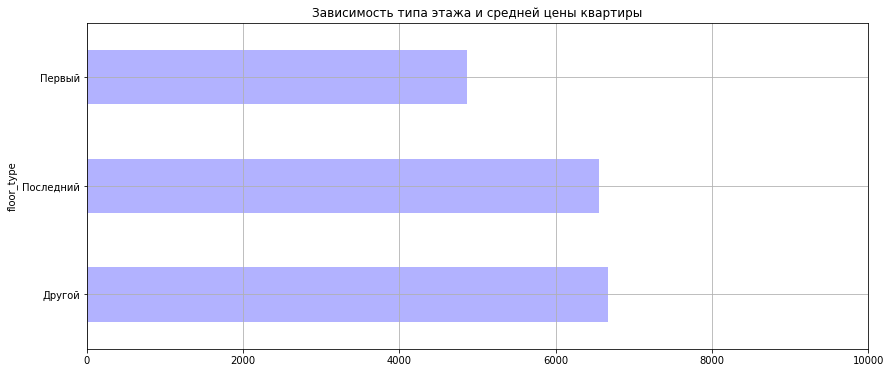

In [86]:
(
    data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость типа этажа и средней цены квартиры', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(0, 10000))
)

Кваритры на первом этаже продаются по средней цене ниже, чем на последнем и других этажах, разница составляет болеет 1.5 млн. На других этажах средняя цена квартиры незначительно больше. Таким образом, существует зависимость между средней цены квартиры и на каком этаже она расположена.

Зависимость цены квартиры от даты размещения (день недели, месяц, год). Для данного анализа построим столбчатые диаграммы зависмости средней цены квартиры от дня недели, месяца и года публикации.

<AxesSubplot:title={'center':'Зависимость года публикации и средней цены квартиры'}, ylabel='year_exposition'>

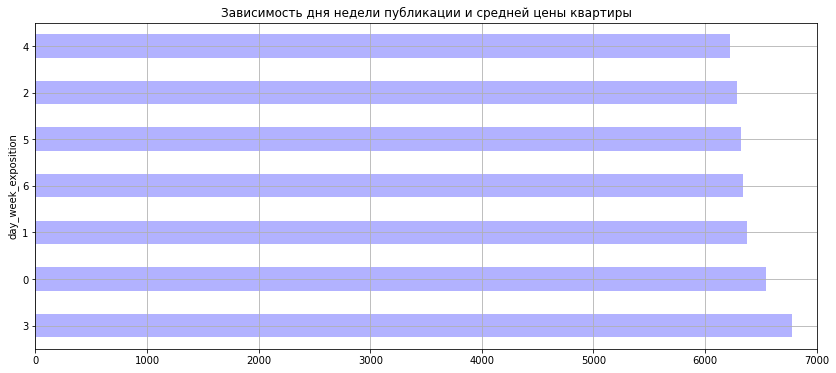

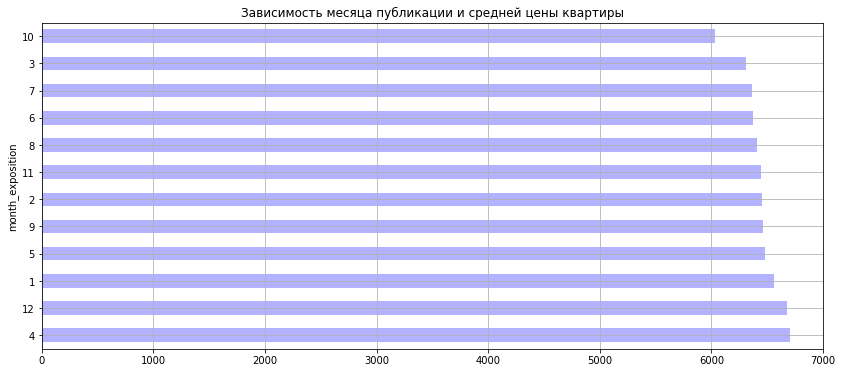

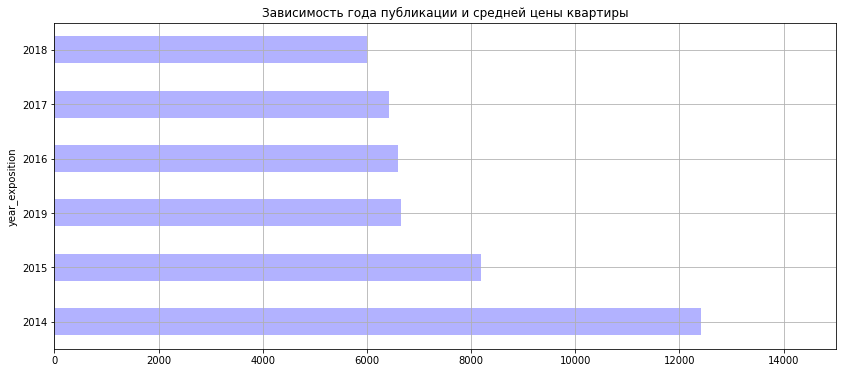

In [87]:
(
    data
    .pivot_table(index = 'day_week_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость дня недели публикации и средней цены квартиры', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(0, 7000))
)

(
    data
    .pivot_table(index = 'month_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость месяца публикации и средней цены квартиры', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(0, 7000))
)

(
    data
    .pivot_table(index = 'year_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость года публикации и средней цены квартиры', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(0, 15000))
)

- Зависимость дня недели публикации и средней цены квартиры

По первой столбчатой диаграмме видно, что средняя цена квартир, объявления о продаже которых опубликвали в понедельник и среду немного выше, чем в другие дни, но прямой зависимости средней цены от дня недели публикации не прослеживается.

- Зависимость месяца публикации и средней цены квартиры

Второй график показывает разницу в средней цене между квартирами, объявление о продаже которых было опубликовано в апреле и в октябре: она составила больше полумиллиона рублей. Возможно, продавцы занижаются цены, продавая квартиру ближе к Новому году, чтобы быстрее совершить сделку.

- Зависимость года публикации и средней цены квартиры

Третья столбчатая диаграмма показывает, что дороже всего в среднем продавались квартиры, объявления по которым были опубликованы в 2014 году, а дешевле - в 2018. Для интерпертации данного результата необходимо изучить рынки недвижимости по каждому году, прямой зависимости средней цены квартиры от года публикации не прослеживается.


Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [88]:
top_ten_name = data['locality_name'].value_counts().head(10) #выводим 10 населеных пунктов с наибольшим числом объявлений
print(top_ten_name)

Санкт-Петербург      13707
Мурино                 434
поселок Шушары         378
Всеволожск             349
Пушкин                 328
Колпино                319
Гатчина                284
поселок Парголово      267
деревня Кудрово        220
Выборг                 187
Name: locality_name, dtype: int64


In [89]:
(
    data
    .query('locality_name in (@top_ten_name.index)')
    .pivot_table(index='locality_name', values='price_one_square_meter', aggfunc='mean')
    .sort_values(by='price_one_square_meter', ascending=False)
)

,price_one_square_meter
locality_name,
Санкт-Петербург,113.220743
Пушкин,103.410399
деревня Кудрово,92.251569
поселок Парголово,90.047756
Мурино,85.555941
поселок Шушары,77.666526
Колпино,75.169413
Всеволожск,69.043290
Гатчина,68.943591


<AxesSubplot:title={'center':'Зависимость средней стоимости объекта от расстояния до центра города, Санкт-Петербург'}, ylabel='locality_name'>

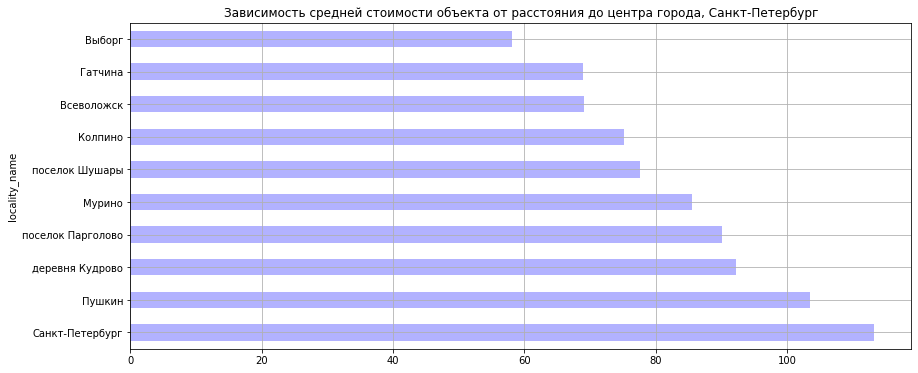

In [90]:
(
    data
    .query('locality_name in (@top_ten_name.index)')
    .pivot_table(index='locality_name', values='price_one_square_meter', aggfunc='mean')
    .sort_values(by='price_one_square_meter', ascending=False)
    .plot(y='price_one_square_meter', kind='barh', color='blue', title='Зависимость средней стоимости объекта от расстояния до центра города, Санкт-Петербург', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True)
)


 - Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург = 113 тыс. рублей за м2

 - Населённый пункт с самой низкой стоимостью жилья: Выборг = 58 тыс. рублей за м2

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра, узнаем, как стоимость объектов зависит от расстояния до центра города.

In [91]:
#сохранили в отдельный датафрейм данные по Санкт-Петербургу,
#установили условие для cityCenters_nearest, чтобы не включать в датасет значения, которыми мы заменили пропуски 
spb_data = data.loc[(data['cityCenters_nearest'] != -1) & (data['locality_name'] == "Санкт-Петербург")]
display(spb_data.head(20)) #проверяем датасет 
display(spb_data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120.370370,3,3,2019,Другой,16.0
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92.785714,3,8,2015,Другой,14.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100.000000,1,6,2018,Другой,8.0
9,18,5400,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88.524590,6,2,2017,Другой,15.0
10,5,5050,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127.525253,3,11,2017,Другой,14.0
15,16,4650,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19,119.230769,5,11,2017,Другой,14.0
16,11,6700,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397,81.707317,3,11,2017,Первый,11.0
17,6,4180,36.0,2016-09-09,1,2.65,17,16.5,7,False,False,False,11.0,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571,116.111111,4,9,2016,Другой,15.0
18,8,3250,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168,104.838710,4,1,2017,Другой,11.0
19,16,14200,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97,117.355372,2,1,2019,Другой,13.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13666 entries, 0 to 23608
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            13666 non-null  int64         
 1   last_price              13666 non-null  int64         
 2   total_area              13666 non-null  float64       
 3   first_day_exposition    13666 non-null  datetime64[ns]
 4   rooms                   13666 non-null  int64         
 5   ceiling_height          13666 non-null  float64       
 6   floors_total            13666 non-null  int64         
 7   living_area             13666 non-null  float64       
 8   floor                   13666 non-null  int64         
 9   is_apartment            13666 non-null  bool          
 10  studio                  13666 non-null  bool          
 11  open_plan               13666 non-null  bool          
 12  kitchen_area            13666 non-null  float6

None

Коэффициент корреляции : -0.328


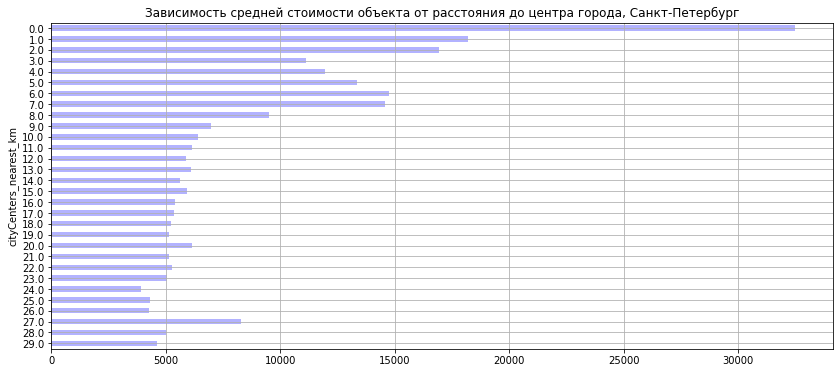

In [92]:
(
    spb_data
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .sort_values(by='cityCenters_nearest_km', ascending=False)
    .plot(y='last_price', kind='barh', color='blue', title='Зависимость средней стоимости объекта от расстояния до центра города, Санкт-Петербург', 
          figsize=(14, 6), legend=False, alpha=0.3, grid=True)
)

corr_spb_center = spb_data['last_price'].corr(spb_data['cityCenters_nearest_km'])
print('Коэффициент корреляции :', '{:.3f}'.format(corr_spb_center))

Коэффициент корреляции: -0.328, означает слабую обратную связь (чем дальше - тем дешевле) между стоимостью объектов и расстоянием до центра города по городу Санкт-Петербургу. Действительно, в радиусе 10 км встречаются и дорогие квартиры (более 30 млн), так и квартиры дешевле (около 11 млн). Тем не менее в радиусе более 10 км нет квартир дороже 10 млн.

### Общий вывод

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">

В данном прокте мы провели комплексное исследование архива объявлений за несколько лет (2014-2019) о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нашей задачей было — установить ***параметры*** для определения рыночной стоимости объектов недвижимости и построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность.

В **предобработке данных** мы заполнили пропуски там, где это можно было сделать, и убрали аномальные значения, которые ммогли бы повлиять на результат анализа, в результате были внесены следующие изменения в исходные данные:

- в столбце `ceiling_height`заменили 38 % пропусков медианным значением
- в столбце `floors_total` удалили 0.36% строк с пропусками 
- в столбце `is_apartment`заменили 88% пропусков значением False
- в столбце `balcony`заполнили 48% пропусков значением 0
- в столбце `locality_name` удалили 0.2 % строк с пропусками и сократили количество уникальных значений с 364 до 320
- в столбце `cityCenters_nearest` заполнили 21.9% пропусков медианным значением до центра для каждого населенного пункта, а оставшиеся 1,43%, которые было невозможно заполнить, заменили на значения -1 для удобства исследования
- в столбце `days_exposition` заменили 13.4% процента пропусков значением 0

После предобработки датафрейм для исследования содержит 20361 строки, было удалено 14% первоначальных данных.

В ходе **исследовательского анализа** были выявлены параметры, влияющие на рыночную стоимость объекта недвижимости:

1. Общая площадь и жилая площадь(прямая зависимость)
2. Этаж, на котором расположена квартира (квартиры на первом этаже продаются по средней цене ниже, чем на последнем и других этажах)
3. Расположение (квартиры в Санкт-Петербурге стоят дороже, чем в пригороде)
4. Количество комнат (прямая зависимость)

Также было составлено описание типичной квартиры среди всех объявлений:

- Квартира общей площадью 45-50 м2, где жилая площадь около 25 м2, площадь кухни - 10 м2
- Цена от 4 до 5 млн рублей
- 1-2 комнаты
- Продажа совершается в течение двух с половиной месяцев